In [1]:
import torch 

In [2]:
X = torch.rand(4,3)
Y = torch.rand(4,3)
print(f"{X}=X")
print(f"{Y}=Y")
row = torch.cat((X,Y),0)
column = torch.cat((X,Y),1)
print(row)
print(column)

tensor([[0.5217, 0.9501, 0.8683],
        [0.9373, 0.7780, 0.4803],
        [0.6273, 0.0603, 0.4062],
        [0.8750, 0.6672, 0.1809]])=X
tensor([[0.3588, 0.6020, 0.7286],
        [0.5185, 0.6506, 0.6513],
        [0.6173, 0.8237, 0.5645],
        [0.6485, 0.4243, 0.3951]])=Y
tensor([[0.5217, 0.9501, 0.8683],
        [0.9373, 0.7780, 0.4803],
        [0.6273, 0.0603, 0.4062],
        [0.8750, 0.6672, 0.1809],
        [0.3588, 0.6020, 0.7286],
        [0.5185, 0.6506, 0.6513],
        [0.6173, 0.8237, 0.5645],
        [0.6485, 0.4243, 0.3951]])
tensor([[0.5217, 0.9501, 0.8683, 0.3588, 0.6020, 0.7286],
        [0.9373, 0.7780, 0.4803, 0.5185, 0.6506, 0.6513],
        [0.6273, 0.0603, 0.4062, 0.6173, 0.8237, 0.5645],
        [0.8750, 0.6672, 0.1809, 0.6485, 0.4243, 0.3951]])


In [3]:
!pip install d2l

In [4]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [5]:
#데이터셋 생성 단계
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [6]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.4415, 0.2870]) 
label: tensor([6.4004])


In [7]:
#데이터셋 읽는 단계
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]


In [8]:
#직관적 이해를 위한 참조
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.4157, -0.0221],
        [-0.2062,  0.0824],
        [-0.8733,  0.9169],
        [-0.4755,  0.3593],
        [-0.0187, -0.6147],
        [ 0.1887,  0.1583],
        [ 1.6230,  0.7122],
        [-0.1747, -1.2470],
        [-0.2975,  2.8227],
        [ 0.1504, -1.0018],
        [ 1.5373,  0.3368],
        [-1.9996,  0.3616],
        [ 0.1734,  0.2511],
        [-0.0428,  1.0588],
        [ 1.4997,  0.6879],
        [ 0.1051,  0.0395],
        [-0.0512, -0.0652],
        [-0.6629,  0.7705],
        [-0.0220,  0.8121],
        [ 2.1526, -0.4946]]) 
 tensor([[ 4.3011],
        [ 4.7537],
        [ 1.4958],
        [ 3.5583],
        [ 6.3602],
        [ 5.8138],
        [ 9.2994],
        [ 6.8422],
        [ 0.3658],
        [ 7.4640],
        [ 9.6116],
        [-1.0324],
        [ 5.6329],
        [ 3.7685],
        [ 8.9645],
        [ 5.7596],
        [ 5.4481],
        [ 2.3583],
        [ 4.2160],
        [12.6883]])


In [9]:
#모델 파라미터 초기화
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([1.1])

In [10]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [11]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape))** 2 / 2 #y_hat과 shape 맞춰주기

In [12]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad /batch_size
            param.grad.zero_()

In [13]:
#training
lr =  0.01
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [14]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 3.0064, -1.4893], grad_fn=<SubBackward0>)
error in estimating b: tensor([4.4000])


In [27]:
#cost graph 그리기
import matplotlib.pyplot as plt

#training
lr =  0.01
num_epochs = 10
net = linreg
loss = squared_loss

w_list = []
loss_list = []
for epoch in range(num_epochs):
    w_list.append(w)
    loss_list.append(loss)

ValueError: only one element tensors can be converted to Python scalars

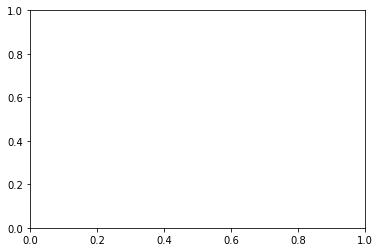

In [33]:
plt.plot(w_list, loss_list)

plt.set_xlabel("w", size = 10, labelpad = 10)
plt.set_ylabel("loss", size = 10, labelpad = 10)
plt.title('cost graph')
plt.show()

In [15]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [16]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [17]:
batch_size = 20
data_iter = load_array((features, labels), batch_size)


In [18]:
next(iter(data_iter))

[tensor([[-1.2430, -1.2888],
         [ 1.2685, -0.9502],
         [-0.1785,  0.9551],
         [ 1.2081, -0.4136],
         [ 0.0883,  0.9511],
         [ 0.2801,  0.9144],
         [-1.9493,  0.1604],
         [ 0.1702,  0.6224],
         [ 0.1627, -1.2289],
         [-0.2437, -0.5255],
         [-1.3700, -0.3711],
         [ 1.3862,  0.4958],
         [ 0.4834, -0.3387],
         [-0.9206, -0.1186],
         [ 1.0276, -1.8433],
         [ 1.0439,  0.5290],
         [-0.3051, -0.2733],
         [-1.8420,  1.5544],
         [ 0.3137, -0.5873],
         [-1.1389,  0.5143]]),
 tensor([[ 3.6702],
         [10.7380],
         [ 3.5402],
         [ 9.7578],
         [ 4.3268],
         [ 4.9786],
         [-0.5912],
         [ 5.0648],
         [ 7.8236],
         [ 5.5521],
         [ 1.9493],
         [ 8.8919],
         [ 7.4599],
         [ 2.9218],
         [11.3468],
         [ 7.8419],
         [ 5.0049],
         [-2.3723],
         [ 7.3388],
         [ 1.2845]])]

In [19]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [20]:
#모델 파라미터 초기화
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [21]:
loss = nn.MSELoss()

In [22]:
trainer = torch.optim.SGD(net.parameters(), lr=0.01)

In [23]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.718934
epoch 2, loss 0.012894
epoch 3, loss 0.000345


In [24]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0058, -0.0078])
error in estimating b: tensor([0.0126])
